# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [37]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [38]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 592


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [40]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ambodifotatra
Processing Record 2 of Set 1 | nea ionia
Processing Record 3 of Set 1 | west island
Processing Record 4 of Set 1 | alice springs
Processing Record 5 of Set 1 | hawaiian paradise park
Processing Record 6 of Set 1 | blackmans bay
Processing Record 7 of Set 1 | ancud
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | port elizabeth
Processing Record 10 of Set 1 | talnakh
Processing Record 11 of Set 1 | polyarnyy
Processing Record 12 of Set 1 | utrik
Processing Record 13 of Set 1 | kavieng
Processing Record 14 of Set 1 | grytviken
Processing Record 15 of Set 1 | lata
Processing Record 16 of Set 1 | vorgashor
Processing Record 17 of Set 1 | adamstown
Processing Record 18 of Set 1 | chibuto
Processing Record 19 of Set 1 | puerto natales
Processing Record 20 of Set 1 | nantucket
Processing Record 21 of Set 1 | nema
Processing Record 22 of Set 1 | nueva gerona
Processing

Processing Record 14 of Set 12 | nsanje
Processing Record 15 of Set 12 | xuchang
Processing Record 16 of Set 12 | todos santos
Processing Record 17 of Set 12 | kuhestan
City not found. Skipping...
Processing Record 18 of Set 12 | bataipora
Processing Record 19 of Set 12 | tateyama
Processing Record 20 of Set 12 | wajima
Processing Record 21 of Set 12 | pokosnoye
Processing Record 22 of Set 12 | waipawa
Processing Record 23 of Set 12 | yaring
Processing Record 24 of Set 12 | isiro
Processing Record 25 of Set 12 | chivilcoy
Processing Record 26 of Set 12 | mandalgovi
Processing Record 27 of Set 12 | nicoya
Processing Record 28 of Set 12 | novocheremshansk
Processing Record 29 of Set 12 | emirdag
Processing Record 30 of Set 12 | nouadhibou
Processing Record 31 of Set 12 | tongliao
Processing Record 32 of Set 12 | ryomgard
Processing Record 33 of Set 12 | khudumelapye
Processing Record 34 of Set 12 | talcahuano
Processing Record 35 of Set 12 | gifhorn
Processing Record 36 of Set 12 | bilma

In [39]:
pprint(city_weather)

{'base': 'stations',
 'clouds': {'all': 73},
 'cod': 200,
 'coord': {'lat': -37.0676, 'lon': -12.3116},
 'dt': 1694723512,
 'id': 3370726,
 'main': {'feels_like': 9.76,
          'grnd_level': 1023,
          'humidity': 63,
          'pressure': 1027,
          'sea_level': 1027,
          'temp': 10.96,
          'temp_max': 10.96,
          'temp_min': 10.96},
 'name': 'Edinburgh of the Seven Seas',
 'sys': {'country': 'SH', 'sunrise': 1694674295, 'sunset': 1694716717},
 'timezone': 0,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 193, 'gust': 4.12, 'speed': 4.13}}


In [41]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [42]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ambodifotatra,-16.9833,49.8500,23.43,79,72,5.76,MG,1694724292
1,nea ionia,38.0373,23.7595,26.45,62,0,1.34,GR,1694724292
2,west island,-12.1568,96.8225,24.99,73,40,4.63,CC,1694724292
3,alice springs,-23.7000,133.8833,9.75,40,0,2.06,AU,1694724085
4,hawaiian paradise park,19.5933,-154.9731,27.16,84,100,1.54,US,1694724293


In [44]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [45]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ambodifotatra,-16.9833,49.8500,23.43,79,72,5.76,MG,1694724292
1,nea ionia,38.0373,23.7595,26.45,62,0,1.34,GR,1694724292
2,west island,-12.1568,96.8225,24.99,73,40,4.63,CC,1694724292
3,alice springs,-23.7000,133.8833,9.75,40,0,2.06,AU,1694724085
4,hawaiian paradise park,19.5933,-154.9731,27.16,84,100,1.54,US,1694724293


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

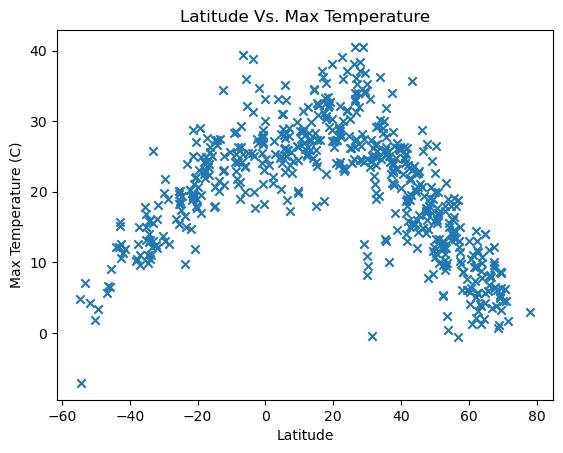

<Figure size 640x480 with 0 Axes>

In [50]:
# Build scatter plot for latitude vs. temperature
# Incorporate the other graph properties

lat = city_data_df['Lat']
temp = city_data_df['Max Temp']

plt.scatter(lat, temp, marker='x')
plt.title('Latitude Vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.show()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

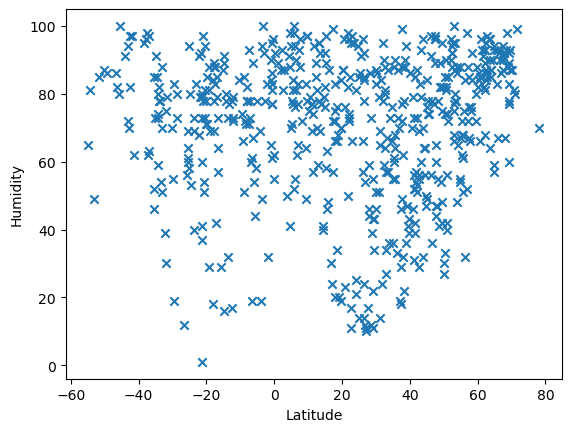

<Figure size 640x480 with 0 Axes>

In [52]:
# Build the scatter plots for latitude vs. humidity
# Incorporate the other graph properties

humidity = city_data_df['Humidity']

plt.scatter(lat, humidity, marker='x')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()
            
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

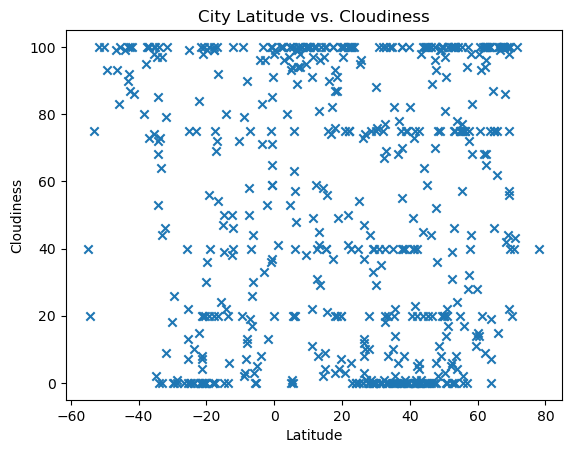

<Figure size 640x480 with 0 Axes>

In [53]:
# Build the scatter plots for latitude vs. cloudiness
# Incorporate the other graph properties

cloudiness = city_data_df['Cloudiness']

plt.scatter(lat, cloudiness, marker='x')
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

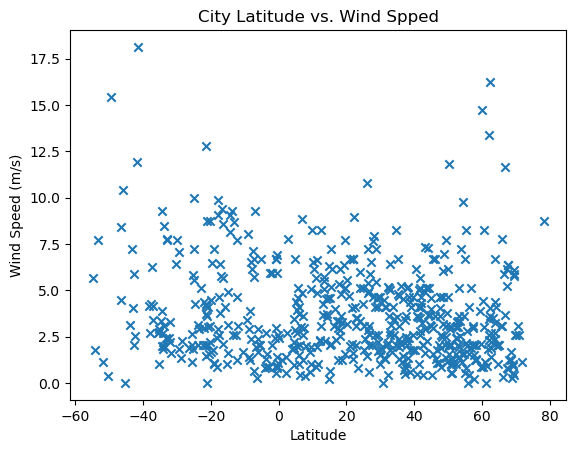

<Figure size 640x480 with 0 Axes>

In [55]:
# Build the scatter plots for latitude vs. wind speed
# Incorporate the other graph properties

wind_speed = city_data_df['Wind Speed']

plt.scatter(lat, wind_speed, marker='x')
plt.title('City Latitude vs. Wind Spped')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.show()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [231]:
# Define a function to create Linear Regression plots
# linregress(
def linearregression(x, y, y_label, location=(10, 10)):
    res = linregress(x, y)
    # Coefficient of determination (R-squared):

    print(f"R-squared: {res.rvalue**2:.6f}")
    
    # Plot the data along with the fitted line:
    
    equation_text = (f'y = {res.slope:.2f}x + {res.intercept:.2f}')
    plt.plot(x, y, 'x', label='Cities')
    plt.plot(x, res.intercept + res.slope*x, 'r', label='linear regression trend line')
    # plt.legend()
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.annotate(equation_text, location, fontsize=12, color='red')
    plt.show()


In [222]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"]>=0),:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,nea ionia,38.0373,23.7595,26.45,62,0,1.34,GR,1694724292
4,hawaiian paradise park,19.5933,-154.9731,27.16,84,100,1.54,US,1694724293
9,talnakh,69.4865,88.3972,8.45,93,100,6.10,RU,1694724294
10,polyarnyy,69.1989,33.4478,5.39,77,56,0.91,RU,1694724294
11,utrik,11.2278,169.8474,28.55,77,22,6.61,MH,1694724294


In [212]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"]<0),:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ambodifotatra,-16.9833,49.8500,23.43,79,72,5.76,MG,1694724292
2,west island,-12.1568,96.8225,24.99,73,40,4.63,CC,1694724292
3,alice springs,-23.7000,133.8833,9.75,40,0,2.06,AU,1694724085
5,blackmans bay,-43.0167,147.3167,15.07,72,90,4.02,AU,1694724293
6,ancud,-41.8697,-73.8203,11.33,97,100,11.90,CL,1694724293


###  Temperature vs. Latitude Linear Regression Plot

R-squared: 0.601407


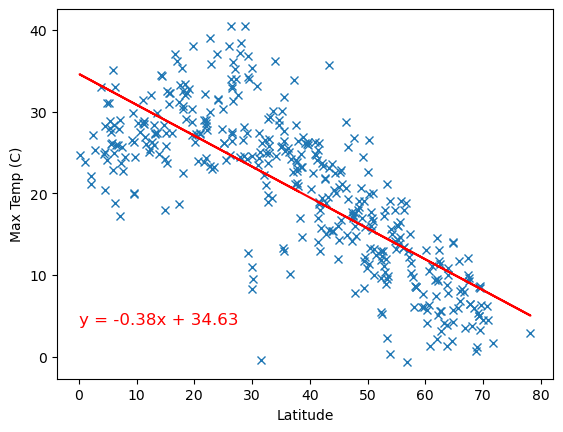

In [250]:
# Linear regression on Northern Hemisphere

x = northern_hemi_df["Lat"]
y = northern_hemi_df["Max Temp"]


linearregression(x, y, "Max Temp (C)", (0, 4))

R-squared: 0.697123


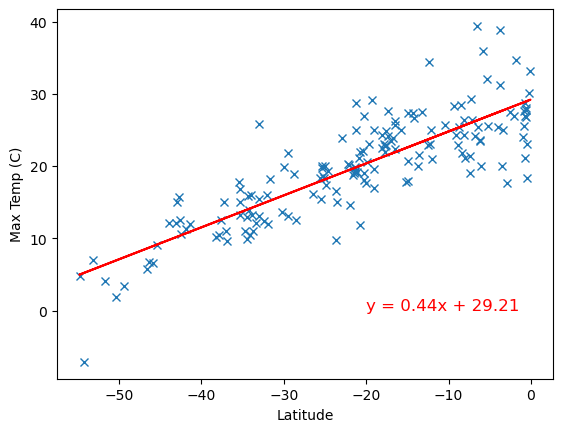

In [257]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Max Temp"]

linearregression(x, y, "Max Temp (C)", (-20, 0))

**Discussion about the linear relationship:** There is a postitive correlation between latitude and max temperature. 

### Humidity vs. Latitude Linear Regression Plot

R-squared: 0.018845


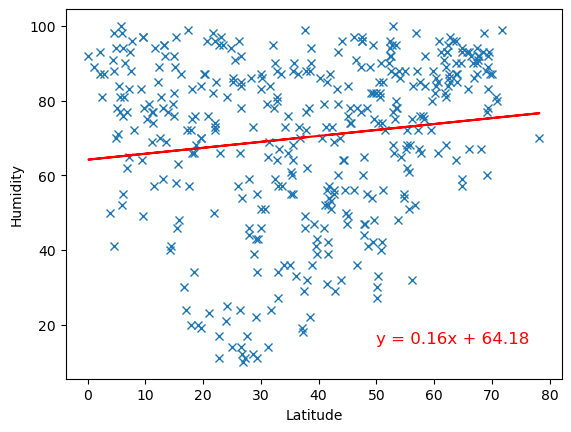

In [258]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Humidity"]

linearregression(x, y, "Humidity", (50,15))

R-squared: 0.009279


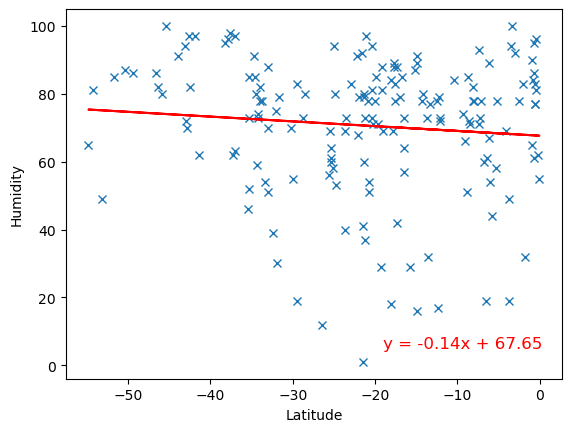

In [256]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Humidity"]

linearregression(x, y, "Humidity", (-19, 5))

### Cloudiness vs. Latitude Linear Regression Plot

R-squared: 0.000029


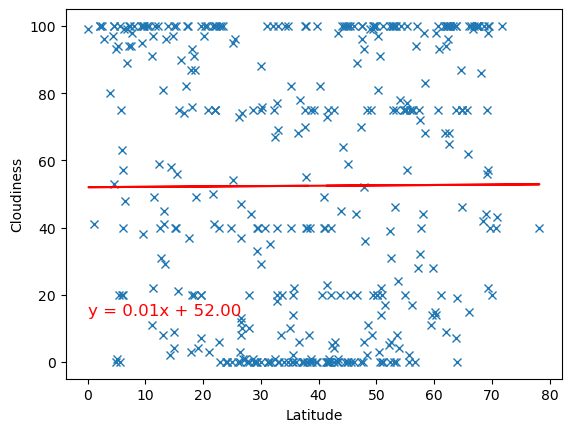

In [242]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Cloudiness"]

linearregression(x, y, "Cloudiness", (0,14))

R-squared: 0.052830


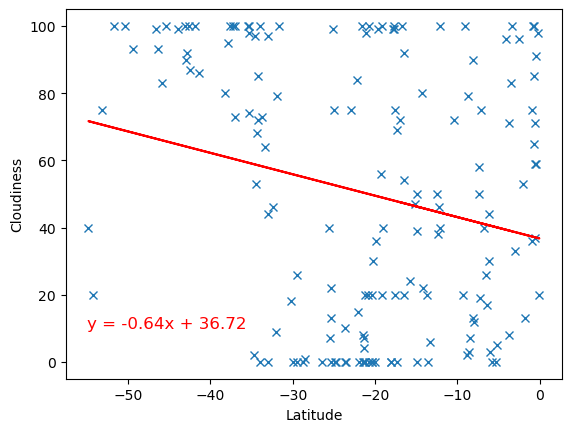

In [244]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Cloudiness"]

linearregression(x, y, "Cloudiness", (-55, 10))

**Discussion about the linear relationship:** There is not a strong correlation between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

R-squared: 0.002228


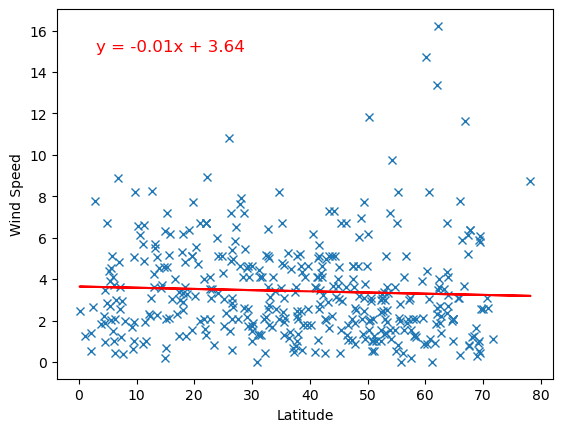

In [245]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Wind Speed"]

linearregression(x, y, "Wind Speed", (3, 15))

R-squared: 0.030280


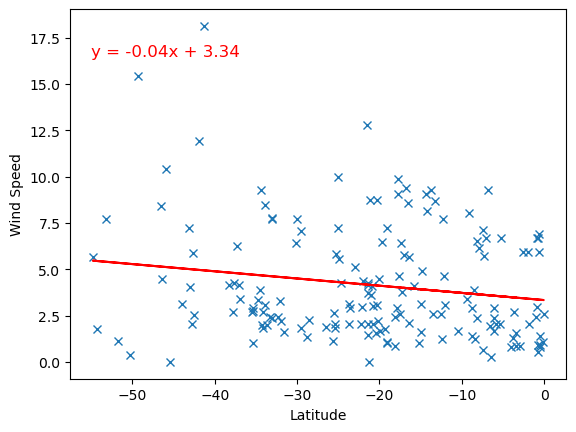

In [248]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Wind Speed"]

linearregression(x, y, "Wind Speed", (-55,16.5))

**Discussion about the linear relationship:** There is not a correlation between latitude and wind speed.